In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

import psycopg2

In [2]:
conn_str = "host={} dbname={} user={} password={}".format('localhost', 'airbnb_la', 'jlanders', '')
conn = psycopg2.connect(conn_str)


In [4]:
columns = ['longitude', 'room_type', 'price', 'number_of_reviews']
table = 'listings'
query = 'select '+', '.join(columns)+' from '+table

select longitude, room_type, price, number_of_reviews from listings


In [5]:
df = pd.read_sql(query, con=conn)

In [8]:
df['room_type_bin'] = [1 if typ == 'Private room' else 0 for typ in df.room_type]

In [14]:
for col in df.columns:
    try:
        df[col] = pd.as_numeric(df[col])
    except:
        print(col)

room_type


In [16]:
X = df[['room_type_bin', 'longitude', 'number_of_reviews']]
# X_normed = pd.DataFrame({'loudness':stats.zscore(music.loudness), 'duration':stats.zscore(music.duration)})

Y = df['price']
# Y_normed=stats.zscore(Y)

In [ ]:
# Trying a different dataset

In [25]:
df2 = pd.read_csv('winequality-white.csv', delimiter=';')

In [37]:
Y = df2.quality
X = df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density',
       'pH',  'alcohol']]
#  'total sulfur dioxide','sulphates',

In [34]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


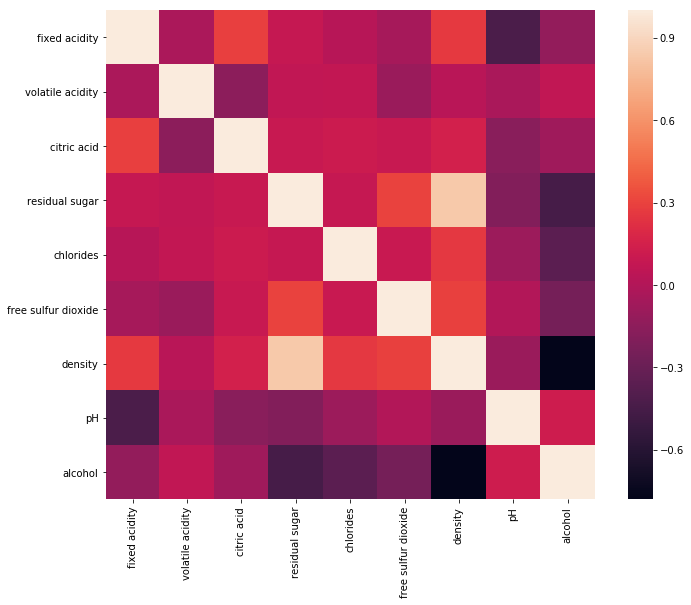

In [38]:
corrmat = X.dropna().corr()

fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True)

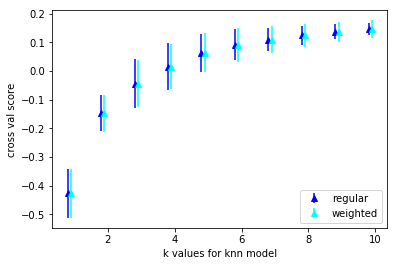

In [39]:

score_d= {'knn':[], 'knn_w':[],'knn_n':[], 'knn_nw':[]}
for n in range(1,11): 
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    score = cross_val_score(knn, X, Y, cv=5)
#     print("\nUnweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    score_d['knn'].append(score)

    knn_w = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
    score = cross_val_score(knn_w, X, Y, cv=5)
#     print("\nWeighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    score_d['knn_w'].append(score)

#     knn_n = neighbors.KNeighborsRegressor(n_neighbors=n)
#     score = cross_val_score(knn_n, X_normed, Y, cv=5)
# #     print("\nUnweighted normed Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#     score_d['knn_n'].append(score)
    
#     knn_nw = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
#     score = cross_val_score(knn_nw, X_normed, Y, cv=5)
# #     print("\nWeighted and normed Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#     score_d['knn_nw'].append(score)

# plt.scatter(list(range(1,10)), [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))])
plt.errorbar([ik-.2 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn'][ik].std() for ik in range(len(score_d['knn']))], linestyle='None', marker='^', color= 'blue', label = 'regular')
plt.errorbar([ik-.1 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_w'][ik].std() for ik in range(len(score_d['knn_w']))], linestyle='None', marker='^', color = 'cyan', label='weighted')
# plt.errorbar([ik for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_n'][ik].std() for ik in range(len(score_d['knn_n']))], linestyle='None', marker='^', color = 'red', label='normalized')
# plt.errorbar([ik+.1 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_nw'][ik].std() for ik in range(len(score_d['knn_nw']))], linestyle='None', marker='^', color = 'magenta', label='normalized and weighted')
plt.legend(loc=4)
plt.xlabel('k values for knn model')
plt.ylabel('cross val score')



In [45]:
from sklearn import svm
clf = svm.SVR()
score = cross_val_score(clf, X, Y, cv=5)
print(score)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[ 0.17737327  0.22397483  0.20758264  0.1868416   0.06565559]


In [47]:
sgd_reg = linear_model.SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
       epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

score = cross_val_score(sgd_reg, X, Y, cv=5)
print(score)

[ -8.30365410e+16  -7.53945251e+16  -3.02632395e+17  -1.96470068e+16
  -2.50814380e+15]
